### Descriptive Analysis on Health Insurance Policies

1. Exploratory Data Analysis
    + Features knowledge

EDA driven on Sinister dataset, followed over some assumptions

### Policy Dataset Analysis

In [1]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.tools.plotting import scatter_matrix
mpl.style.use('ggplot')
%matplotlib inline

Lo que se pretende aquí es hacer una inspección de la naturaleza de las pólizas de GMM, señalando todas las variables pertinentes y posteriormente ver como se distribuye la cartera en los descriptivos de Tableau y la segmentación de los datasets

In [3]:
df = pd.read_csv("polizas-prima.csv", parse_dates=True, encoding="latin1")

In [4]:
print(df.head())
#this time we parse from the begining

   RAMSUBRAMO  NPOLIZA ID_CONTRATANTE                        CONTRATANTE  \
0         110       11  MARL610905CK8      LUIS FERNANDO MALDONADO ROJAS   
1         110       12  VILM601031941             MIRNA VILLARREAL LOPEZ   
2         110       13     SACB890421  BRENDA ELIZABETH SANCHEZ CORONADO   
3         110       14  GUAA571105LS0        ALEJANDRO GUERRERO ALVARADO   
4         110       15  GUAA571105LS0        ALEJANDRO GUERRERO ALVARADO   

   ID_AGENTE  PMAANUAL  FINIVIG  STPOLIZA       POBLACION  CODPOST  EDO  \
0        270    923.46  1100319         4       MONTERREY    64105   19   
1        270    923.46  1100319         4       MONTERREY    64710   19   
2        270    923.46  1100322         4  SANTA CATARINA    66149   19   
3        270    923.46  1100322         4        SANTIAGO    67300   19   
4        270    923.46  1100322         4        SANTIAGO    67300   19   

   NUM_ASEG        SUBRAMO  SA  
0       1.0  AP INDIVIDUAL NaN  
1       1.0  AP INDIVIDUAL

In [5]:
def missing_values_table(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum()/len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table

In [6]:
missing = missing_values_table(df)
missing = missing[missing['Missing Values'] > 0] #showing only all those are not zero
print(missing)

                Missing Values  % of Total Values
ID_CONTRATANTE            3979           0.293851
CONTRATANTE                  6           0.000443
POBLACION                 4678           0.345473
NUM_ASEG                 25009           1.846928
SA                      615088          45.424589


In [7]:
#columns and data types
df.dtypes 

RAMSUBRAMO          int64
NPOLIZA             int64
ID_CONTRATANTE     object
CONTRATANTE        object
ID_AGENTE           int64
PMAANUAL          float64
FINIVIG             int64
STPOLIZA            int64
POBLACION          object
CODPOST             int64
EDO                 int64
NUM_ASEG          float64
SUBRAMO            object
SA                float64
dtype: object

In [8]:
#quita nulos de contratantes
df = df[df['CONTRATANTE'].notnull()]

In [9]:
#los casos positivos
df = df[(df['NUM_ASEG'] > 0) & (df['PMAANUAL'] > 0)]

In [10]:
#Se parsean las fechas
df = df[(df['FINIVIG']-1000000+20000000) >=20000000]

In [11]:
df['FINIVIG'] = pd.to_datetime((df['FINIVIG']-1000000+20000000).astype(str), format='%Y%m%d', errors='coerce')

In [12]:
#Suma asegurada
df['SA'] = df['SA'].fillna(df['SA'].mean())

In [13]:
#Número de asegurados por póliza
df['NUM_ASEG'] = df['NUM_ASEG'].fillna(df['NUM_ASEG'].mean())

In [14]:
#Si no tienen RFC se usa su nombre
df['ID_CONTRATANTE'] = df['ID_CONTRATANTE'].fillna(df['CONTRATANTE'])

In [15]:
#Bandera de póliza vigente
df['POLIZA_VIGENTE'] = np.where(df['STPOLIZA']==3, 1, 0)

Un vistazo de los datos transformados

In [16]:
df_head = df.sort_values(['PMAANUAL'], ascending=False).head(5)
print(df_head)

         RAMSUBRAMO  NPOLIZA ID_CONTRATANTE                       CONTRATANTE  \
860727         1005   167201  AEM-790919-HP   ASOC. EDUCACIONAL MEX. CENTRAL,   
1240466        1036   100103   CJF950204TL0  CONSEJO DE LA JUDICATURA FEDERAL   
1336835        1036   100105   CJF950204TL0  CONSEJO DE LA JUDICATURA FEDERAL   
1284232        1036   100104   CJF950204TL0  CONSEJO DE LA JUDICATURA FEDERAL   
1240970        1036   100203   CJF950204TL0  CONSEJO DE LA JUDICATURA FEDERAL   

         ID_AGENTE      PMAANUAL    FINIVIG  STPOLIZA               POBLACION  \
860727        4576  4.722794e+08 2000-09-01         3                  MEXICO   
1240466      12216  3.953211e+08 2014-12-31         3  ALVARO OBREGON, MEXICO   
1336835      12216  3.550067e+08 2016-12-31         3  ALVARO OBREGON, MEXICO   
1284232      12216  3.474278e+08 2015-12-31         3  ALVARO OBREGON, MEXICO   
1240970      12216  3.407775e+08 2014-12-31         3                  MEXICO   

         CODPOST  EDO  NUM

Hay pólizas con el mismo contratante, hay que agrupar a los contratantes, hay que ver si los nombres y los ids corresponden

In [17]:
df.shape

(1329010, 15)

In [18]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
df[['PMAANUAL','NUM_ASEG','SA']].describe()

,PMAANUAL,NUM_ASEG,SA
count,1.329e+06,1.329e+06,1.329e+06
mean,1.421e+04,1.064e+01,1.675e+06
std,1.114e+06,1.280e+03,6.724e+06
min,3.636e+01,1.000e+00,1.110e+02
25%,1.019e+03,1.000e+00,2.500e+05
50%,1.616e+03,1.000e+00,1.500e+06
75%,1.925e+03,1.000e+00,1.675e+06
max,4.723e+08,5.039e+05,4.100e+08


In [19]:
df_poliza = df.groupby('CONTRATANTE')['PMAANUAL'].sum()

In [20]:
print(df_poliza.sort_values(ascending=False).head(20))

CONTRATANTE
CONSEJO DE LA JUDICATURA FEDERAL                           4.959e+09
BANCO MERCANTIL DEL NORTE  S.A. INST. DE BANCA MULTIPE     7.455e+08
UNIVERSIDAD NACIONAL AUTONOMA DE MEXICO                    6.300e+08
BANCO MERCANTIL DEL NORTE, S.A.                            6.253e+08
BANCO MERCANTIL DEL NORTE  S.A. INST. DE BANCA MULTIPLE    5.049e+08
SUPREMA CORTE DE JUSTICIA DE LA NACION                     4.877e+08
ASOC. EDUCACIONAL MEX. CENTRAL,                            4.723e+08
GOBIERNO DEL EDO. DE JALISCO                               2.797e+08
ASESORIA DE EMPRESAS, S.A. DE C.V.                         2.737e+08
UNIVERSIDAD AUTONOMA METROPOLITANA                         2.647e+08
TRIBUNAL ELECTORAL DEL PODER JUDICIAL DE LA FEDERACION     2.386e+08
COOPERATIVA LA CRUZ AZUL, S.C.L.                           1.914e+08
GENERAL MOTORS DE MEXICO S DE RL DE CV                     1.549e+08
WFO, S.A. DE C.V.                                          1.368e+08
IXE BANCO, S.A., INSTI

Descriptivos de las variables continuas

In [21]:
#correlations
numeric_features = df[['PMAANUAL','NUM_ASEG']]
correlations = numeric_features.corr(method='pearson')
print(correlations)

          PMAANUAL  NUM_ASEG
PMAANUAL     1.000     0.155
NUM_ASEG     0.155     1.000


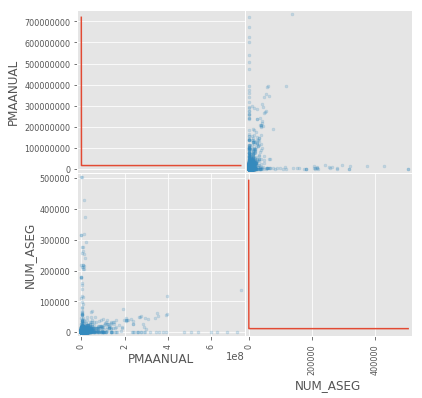

In [20]:
plt.figure(figsize=[10,10])
scatter_matrix(numeric_features, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()

In [22]:
skew = numeric_features.skew()
print(skew)

PMAANUAL    261.337
NUM_ASEG    252.030
dtype: float64


In [23]:
#df['GRUPO'] = df['DIS_DESCRIPTION'].str.split().str.get(0)
#df.head() 
#it gets the fisrt string

In [24]:
df['CONTRATANTE'].count()

1329010

In [25]:
clientes=[]
contratantes=df['CONTRATANTE']

for registro in contratantes:
    if ('BANORTE' in registro or 'MERCANTIL' in registro):
        clientes.append('BANORTE')
    elif ('JUDICATURA' in registro): 
        clientes.append('JUDICATURA')
    elif ('PETRO' in registro or 'PEMEX' in registro): 
        clientes.append('PEMEX')
    elif ('UNIVERSIDAD' in registro or 'COLEGIO' in registro or 'SUPERIOR' in registro): 
        clientes.append('UNIVERSIDADES')
    elif ('SINDICATO' in registro or 'S.U.T.' in registro or 'SIND' in registro or 'SUT' in registro or 'SNTE' in registro or 'S.T.I.R.T.' in registro or 'C.T.M.' in registro): 
        clientes.append('SINDICATOS')
    elif ('SECRETARIA' in registro or 'GOBIERNO' in registro or 'MUNICIPIO' in registro or 'FISCAL' in registro or 'TRIBUNAL' in registro or 'AYUNTAMIENTO' in registro or 'ESTATAL' in registro or 'JUSTICIA' in registro): 
        clientes.append('GOBIERNO')
    else: clientes.append('OTRO')

In [26]:
len(clientes)

1329010

In [27]:
df['CLIENTES']=clientes
df['CLIENTES'].count()

1329010

In [28]:
df.groupby('CLIENTES').size()

CLIENTES
BANORTE             3077
GOBIERNO            1493
JUDICATURA           277
OTRO             1320373
PEMEX                233
SINDICATOS          1618
UNIVERSIDADES       1939
dtype: int64

In [30]:
#df['CONTRATANTE'].str.contains("BANORTE") | df['CONTRATANTE'].str.contains("MERCANTIL")

In [79]:
df_banorte = df[(df['CONTRATANTE'].str.contains("BANORTE")) | (df['CONTRATANTE'].str.contains("MERCANTIL"))]

In [79]:
#lo que representa en cartera las pólizas de la empresa
df_banorte['PMAANUAL'].sum()/df['PMAANUAL'].sum()*100

24.53073476842062

In [80]:
df_judicatura = df[df['CONTRATANTE'].str.contains("JUDICATURA")]

In [80]:
df_judicatura['PMAANUAL'].sum()/df['PMAANUAL'].sum()*100

12.524202827433015

In [81]:
df_pemex = df[(df['CONTRATANTE'].str.contains("PETROLEOS")) | (df['CONTRATANTE'].str.contains("PEMEX"))]

In [82]:
df_pemex['PMAANUAL'].sum()/df['PMAANUAL'].sum()*100

6.160917954162783

In [77]:
df_uni = df[(df['CONTRATANTE'].str.contains("UNIVER")) 
   | (df['CONTRATANTE'].str.contains("COLEGIO"))
   | (df['CONTRATANTE'].str.contains("SUPERIOR"))]

In [83]:
df_uni['PMAANUAL'].sum()/df['PMAANUAL'].sum()*100

2.4015403642680595

In [86]:
df_sind = df[(df['CONTRATANTE'].str.contains("SINDICATO")) 
   | (df['CONTRATANTE'].str.contains("S.U.T."))
   | (df['CONTRATANTE'].str.contains("SIND"))
   | (df['CONTRATANTE'].str.contains("SUT"))
   | (df['CONTRATANTE'].str.contains("SNTE"))
   | (df['CONTRATANTE'].str.contains("S.T.I.R.T."))
   | (df['CONTRATANTE'].str.contains("C.T.M."))]

In [87]:
df_sind['PMAANUAL'].sum()/df['PMAANUAL'].sum()*100

14.425230559406769

In [88]:
df_gob = df[(df['CONTRATANTE'].str.contains("SECRETARIA")) 
   | (df['CONTRATANTE'].str.contains("GOBIERNO"))
   | (df['CONTRATANTE'].str.contains("MUNICIPIO"))
   | (df['CONTRATANTE'].str.contains("FISCAL"))
   | (df['CONTRATANTE'].str.contains("TRIBUNAL"))
   | (df['CONTRATANTE'].str.contains("AYUNTAMIENTO"))
   | (df['CONTRATANTE'].str.contains("ESTATAL"))
   | (df['CONTRATANTE'].str.contains("JUSTICIA"))   ]

In [89]:
df_gob['PMAANUAL'].sum()/df['PMAANUAL'].sum()*100

12.05661472790776

+ Hacer un dataset de las cuentas más grandes, mayor número de prima y asegurados
+ Hacer la etiquetación de las cuentas

In [29]:
print(df)

         RAMSUBRAMO  NPOLIZA                 ID_CONTRATANTE  \
0               110       11                  MARL610905CK8   
1               110       12                  VILM601031941   
2               110       13                     SACB890421   
3               110       14                  GUAA571105LS0   
4               110       15                  GUAA571105LS0   
5               110       16                     MULG710813   
6               110       17                     PESE780208   
7               110       18                  CARG561022IH7   
8               110       19                     GAGE470506   
9               110       20                     HEFR661221   
10              110       21                     RICB570414   
11              110       22                  GAML8112139U5   
12              110        6                  MASJ770726Q15   
13              110        7                  CAGL800527931   
14              110        8                  MARL61090

Listo para descriptivos

In [30]:
df.to_csv('polizas-prima-clean.csv', sep=',', encoding="latin1")